# Bottleneck - Optimisation des données

----
### Emmanuel Messori
#### 10/05/2021
----

In [1]:
#chargement des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#chargement des données
erp  = pd.read_excel('erp.xlsx')
web = pd.read_excel('web.xlsx')
liaison = pd.read_excel('liaison.xlsx')

C:\Users\teore\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## Nettoyage des données

In [3]:
display(erp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


None

In [4]:
display(web.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

None

In [5]:
display(liaison.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


None

Le fichier `erp` est complet. Dans le fichier `liaison`, qui contient les SKUs de produits (erronement nommées `id_web`), sont present 91 valeurs nulles. Avant d'effectuer les jointures, on ira donc vérifier l'opportunité d'effacer ces lignes. Pour ce qui concerne le fichier `web`, la colonne `sku` presente 85 valeurs nulles qu'on pourra probablement aussi supprimer.

In [6]:
display(liaison.isna().sum())

product_id     0
id_web        91
dtype: int64

In [7]:
display(web.isna().sum())

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

In [8]:
display(web[web.sku.isnull()])

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On va maintenant verifier les lignes du fichier `web `ou la colonne `sku` est nulle. On retrouve juste deux lignes des valeurs non nulles, les autres valeurs non nulles étant des 0 contenus dans les colonnes `virtual`, `downloadable` et `rating_count`: 

In [9]:
nosku = web[web.sku.isnull()]
nosku[nosku.post_title.notnull()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


On peut maintenant nettoyer le fichier, en supprimant le lignes avec sku nulle et aussi retirer les colonnes vides:

In [10]:
web = web.drop(columns=['tax_class', 'post_content', 'post_password', 'post_content_filtered'])
web_c = web.dropna(subset=['sku'])
web_c.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


### Produits sans `id_web`

Dans le fichier `erp` on retrouve plusieurs references qui ne resultent pas en vente sur le site web:

In [11]:
display(erp[erp.onsale_web == 0])

,product_id,onsale_web,price,stock_quantity,stock_status
19,4055,0,86.1,0,outofstock
49,4090,0,73.0,0,outofstock
50,4092,0,47.0,0,outofstock
119,4195,0,14.1,0,outofstock
131,4209,0,73.5,0,outofstock
...,...,...,...,...,...
818,7200,0,31.0,6,instock
819,7201,0,31.0,18,instock
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock


Vérifions maintenant les valeurs nulles du fichier `liaison` en les comparant aux infos présentes sur le fichier `erp`:

In [12]:
ids_webna = liaison[liaison.id_web.isna()]['product_id']
erp_wo_webid = erp[erp['product_id'].isin(ids_webna)]
nosale = erp_wo_webid.onsale_web == 0
outstock = erp_wo_webid.stock_status == 'outofstock'
erp_wo_webid[nosale | outstock]

,product_id,onsale_web,price,stock_quantity,stock_status
19,4055,0,86.1,0,outofstock
49,4090,0,73.0,0,outofstock
50,4092,0,47.0,0,outofstock
119,4195,0,14.1,0,outofstock
131,4209,0,73.5,0,outofstock
...,...,...,...,...,...
817,7196,0,31.0,55,instock
818,7200,0,31.0,6,instock
819,7201,0,31.0,18,instock
820,7203,0,45.0,30,instock


In [13]:
assert erp_wo_webid[nosale | outstock].any(axis='columns').all()

Les produits deporvus de `id_web` ne sont pas en ventes en ligne ou bien ils sont *out of stock*, on pourra donc les retirer du fichier `liaison`.


In [14]:
liaison_c = liaison.dropna(subset=['id_web'])
liaison_c.shape

(734, 2)

Dans le fichier `liaison` on a des `id_web` qui ne sont pas contenus dans le fichier `web`, donc toutes les valeurs sku sont contenues dans le fichier `liaison`. On pourra donc proceder sucessivement à un inner join.

In [15]:
references = set(liaison.id_web).difference(web.sku)
pasr = liaison.id_web.isin(references)
liaison[pasr].merge(erp, how='left', on='product_id')

,product_id,id_web,onsale_web,price,stock_quantity,stock_status
0,4289,13771,0,22.8,0,outofstock
1,4568,15065,0,21.5,0,outofstock
2,4584,14785,0,32.3,0,outofstock
3,4741,12601,0,12.4,0,outofstock
4,4864,15154,0,8.3,0,outofstock
5,4869,14360,0,17.2,0,outofstock
6,4921,15608,0,13.8,0,outofstock
7,4922,15586,0,21.5,0,outofstock
8,5018,15272,0,15.4,0,outofstock
9,5021,15630,0,17.1,0,outofstock


### Verification des clés primaires

Il nous reste à verifier l'unicité des clés primaires de chaque Df. 

In [16]:
assert not erp.duplicated('product_id').any()

In [17]:
assert not liaison_c.duplicated(['product_id']).any()

In [18]:
#assert not web_c.duplicated['sku'].any()

La dernière assertion, effectué sur le DF `web` nous donne un erreur. En effet, chaque ligne du dataframe represente un type de post sur le blog de la boutique. Dans la variable post_type on retrouve deux types principales de post: "attachment" et "product". Après la jointure chaque produit est listé donc deux fois. On va donc maintenant enlever les doublons.


In [19]:
pr = web_c[web_c.post_type == 'product']
pr[pr.duplicated('sku', keep=False)]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


In [20]:
web_c = web_c.drop_duplicates(['sku'])
web_c.shape

(714, 24)

In [21]:
web_c.sku.isin(liaison_c.id_web).all()

True

In [22]:
liaison_c.product_id.isin(erp.product_id).all()

True

----

## Jointure des DataFrames

In [23]:
erp_liaison = pd.merge(erp, liaison_c, how='inner',on='product_id')
erp_liaison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 733
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      734 non-null    int64  
 1   onsale_web      734 non-null    int64  
 2   price           734 non-null    float64
 3   stock_quantity  734 non-null    int64  
 4   stock_status    734 non-null    object 
 5   id_web          734 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 40.1+ KB


In [24]:
df_full = erp_liaison.merge(web_c, how='inner', left_on='id_web', right_on='sku')
display(df_full.head())
#examinons la premiere ligne pour observer toutes le colonnes
df_full.iloc[0]

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,24.2,0,outofstock,15298,15298,0,0,0,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,1,34.3,0,outofstock,15296,15296,0,0,0,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,1,20.8,0,outofstock,15300,15300,0,0,0,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,1,14.1,0,outofstock,19814,19814,0,0,0,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,1,46.0,0,outofstock,19815,19815,0,0,0,...,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


product_id                                                        3847
onsale_web                                                           1
price                                                             24.2
stock_quantity                                                       0
stock_status                                                outofstock
id_web                                                           15298
sku                                                              15298
virtual                                                              0
downloadable                                                         0
rating_count                                                         0
average_rating                                                     0.0
total_sales                                                        6.0
tax_status                                                     taxable
post_author                                                        2.0
post_d

---

## Chiffre d'affaires

In [44]:
#ajout de la colonne total dans df_full
df_full['gross_revenue'] = df_full.price * df_full.total_sales
df_full.shape

(714, 31)

In [26]:

pd.pivot_table(df_full, index='product_id', values='gross_revenue', aggfunc= sum, margins=True).sort_values('gross_revenue', ascending=False)

,gross_revenue
product_id,
All,70568.6
4334,4704.0
4144,4263.0
4402,2288.0
4142,1590.0
...,...
4926,0.0
4924,0.0
4099,0.0


In [28]:
df_full.iloc[0]

product_id                                                        3847
onsale_web                                                           1
price                                                             24.2
stock_quantity                                                       0
stock_status                                                outofstock
id_web                                                           15298
sku                                                              15298
virtual                                                              0
downloadable                                                         0
rating_count                                                         0
average_rating                                                     0.0
total_sales                                                        6.0
tax_status                                                     taxable
post_author                                                        2.0
post_d

In [29]:
df_full.describe()

,product_id,onsale_web,price,stock_quantity,virtual,downloadable,rating_count,average_rating,total_sales,post_author,post_parent,menu_order,comment_count,gross_revenue
count,714.000000,714.0,714.000000,714.000000,714.0,714.0,714.0,714.0,714.000000,714.000000,714.0,714.0,714.0,714.000000
mean,5032.557423,1.0,32.493137,28.746499,0.0,0.0,0.0,0.0,4.012605,1.998599,0.0,0.0,0.0,98.835574
std,790.510878,0.0,27.810525,48.012608,0.0,0.0,0.0,0.0,8.518183,0.037424,0.0,0.0,0.0,307.685071
min,3847.000000,1.0,5.200000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000
25%,4280.250000,1.0,14.100000,2.000000,0.0,0.0,0.0,0.0,0.000000,2.000000,0.0,0.0,0.0,0.000000
50%,4796.000000,1.0,23.550000,12.000000,0.0,0.0,0.0,0.0,1.000000,2.000000,0.0,0.0,0.0,15.250000
75%,5710.500000,1.0,42.175000,35.000000,0.0,0.0,0.0,0.0,4.000000,2.000000,0.0,0.0,0.0,91.150000
max,7338.000000,1.0,225.000000,578.000000,0.0,0.0,0.0,0.0,96.000000,2.000000,0.0,0.0,0.0,4704.000000


----

## Outliers sur les prix de vente

La distribution des prix a un right skew assez prononcé:


count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

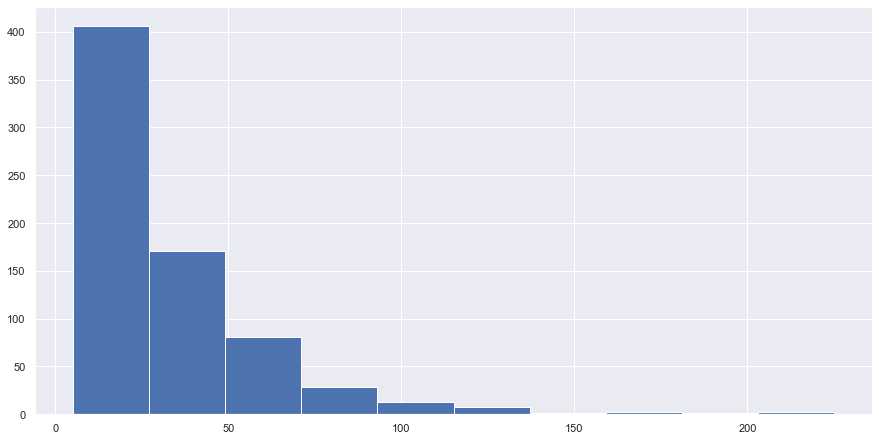

In [35]:
price = df_full["price"]
fig,ax = plt.subplots(figsize=(15,7.5))
display(price.describe())
ax = plt.hist(price)

On va donc calculer l'écart interquartile pour trouver le seuil des outliers:

In [43]:
iqr = np.percentile(df_full.price, 75) - np.percentile(df_full.price, 25)
range_ = 1.5 * iqr
seuil_out = np.percentile(df_full.price, 75) + range_
print(f'Seuil outliers > {seuil_out}')
np.mean(price < 84.28)
# outliers au-dessus du 95% des prix

Seuil outliers > 84.28750000000001


0.9551820728291317

### Liste des outliers

In [32]:
outliers = df_full[df_full.price >= seuil_out]
outliers

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,gross_revenue
63,4115,1,100.0,11,instock,15382,15382,0,0,0,...,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,2020-02-08 11:45:02,2020-02-08 10:45:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
65,4132,1,88.4,5,instock,11668,11668,0,0,0,...,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,2020-02-20 09:55:02,2020-02-20 08:55:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
199,4352,1,225.0,0,outofstock,15940,15940,0,0,0,...,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1125.0
201,4355,1,126.5,2,instock,12589,12589,0,0,0,...,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,2020-08-13 08:15:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1391.5
205,4359,1,85.6,0,outofstock,13853,13853,0,0,0,...,champagne-larmandier-bernier-grand-cru-vieille...,2019-12-23 09:30:11,2019-12-23 08:30:11,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,85.6
218,4402,1,176.0,8,instock,3510,3510,0,0,0,...,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,2288.0
219,4404,1,108.5,2,instock,3507,3507,0,0,0,...,cognac-frapin-fontpinot-xo,2020-08-12 09:30:16,2020-08-12 07:30:16,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,217.0
221,4406,1,157.0,3,instock,7819,7819,0,0,0,...,cognac-frapin-chateau-de-fontpinot-1989-20-ans,2020-03-14 16:05:04,2020-03-14 15:05:04,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
222,4407,1,104.0,6,instock,3509,3509,0,0,0,...,cognac-frapin-cigar-blend,2020-07-04 09:45:03,2020-07-04 07:45:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,104.0
227,4582,1,109.6,7,instock,12857,12857,0,0,0,...,chateau-de-puligny-montrachet-1cru-champ-canet...,2020-02-06 16:35:02,2020-02-06 15:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0


<AxesSubplot:xlabel='price'>

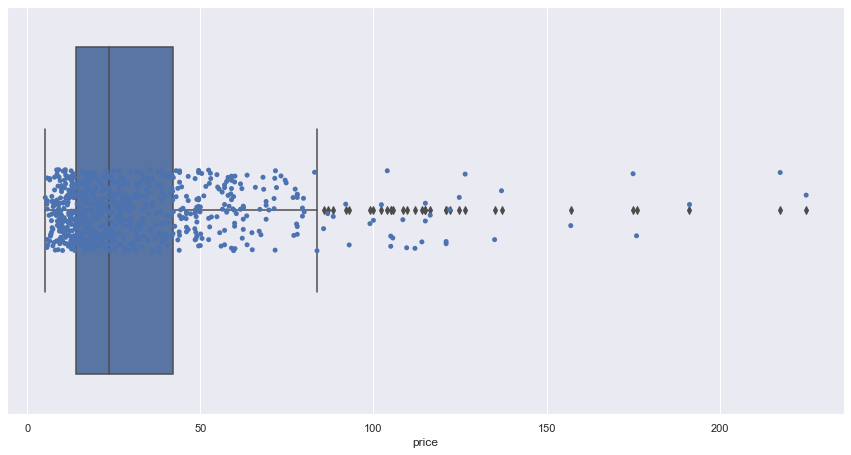

In [39]:
#prix de produits presents dans la boutique en ligne
fig, ax = plt.subplots(figsize=(15, 7.5))
sns.stripplot(x=price)
sns.boxplot(x=price)

In [34]:
outliers.describe()

,product_id,onsale_web,price,stock_quantity,virtual,downloadable,rating_count,average_rating,total_sales,post_author,post_parent,menu_order,comment_count,gross_revenue
count,32.000000,32.0,32.000000,32.000000,32.0,32.0,32.0,32.0,32.000000,32.0,32.0,32.0,32.0,32.000000
mean,5267.937500,1.0,124.571875,7.250000,0.0,0.0,0.0,0.0,1.406250,2.0,0.0,0.0,0.0,217.812500
std,766.699964,0.0,36.068727,5.588006,0.0,0.0,0.0,0.0,3.109397,0.0,0.0,0.0,0.0,505.080853
min,4115.000000,1.0,85.600000,0.000000,0.0,0.0,0.0,0.0,0.000000,2.0,0.0,0.0,0.0,0.000000
25%,4406.750000,1.0,103.575000,2.750000,0.0,0.0,0.0,0.0,0.000000,2.0,0.0,0.0,0.0,0.000000
50%,5025.500000,1.0,114.500000,7.000000,0.0,0.0,0.0,0.0,0.000000,2.0,0.0,0.0,0.0,0.000000
75%,5970.000000,1.0,128.625000,10.250000,0.0,0.0,0.0,0.0,1.250000,2.0,0.0,0.0,0.0,132.250000
max,6216.000000,1.0,225.000000,20.000000,0.0,0.0,0.0,0.0,13.000000,2.0,0.0,0.0,0.0,2288.000000


On a 32 outliers, avec un prix qui varie de 86 euros jusqu'a 225, ce qui est tout a fait normal pour des vins prisés. 
On ne retrouve donc pas de valeurs aberrants. On peux donc par l'instant garder ces references. Ulterieures analyses
seront necessaires pour vérifier la rentabilité des differentes tranches de prix.